In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
NBA = pd.read_csv('NBA_Games.csv').dropna()
NBA.head()

,CITY,TEAM_NAME,TEAM_ID,GAME_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_DATE,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,home,not paired
1,Chicago,Chicago Bulls,1.610613e+09,11300002.0,Bulls,Illinois,1966.0,12013.0,CHI,10/5/2013,...,39.0,56.0,20.0,5.0,10.0,23.0,25.0,6.0,A,0.0
2,Indiana,Indiana Pacers,1.610613e+09,11300002.0,Pacers,Indiana,1976.0,12013.0,IND,10/5/2013,...,27.0,38.0,15.0,12.0,8.0,15.0,23.0,-6.0,H,0.0
3,New Orleans,New Orleans Pelicans,1.610613e+09,11300003.0,Pelicans,Louisiana,2002.0,12013.0,NOP,10/5/2013,...,21.0,33.0,17.0,12.0,4.0,15.0,32.0,1.0,A,0.0
4,Houston,Houston Rockets,1.610613e+09,11300003.0,Rockets,Texas,1967.0,12013.0,HOU,10/5/2013,...,30.0,35.0,24.0,9.0,4.0,22.0,27.0,-1.0,H,0.0
5,Golden State,Golden State Warriors,1.610613e+09,11300004.0,Warriors,California,1946.0,12013.0,GSW,10/5/2013,...,38.0,52.0,21.0,13.0,5.0,23.0,31.0,-9.0,A,0.0


In [11]:
NBAR18 = NBA[NBA.SEASON_ID == 22018]
NBAR18 = NBAR18.dropna()

In [12]:
NBAR18["counter"] = 1
NBAR18["win"] = np.where(NBAR18.WL=="W", 1, 0)
NBAR18[:][["TEAM_NAME","home", "MATCHUP", "PTS", "PTSAGN", "WL", "win", "counter"]].tail()

,TEAM_NAME,home,MATCHUP,PTS,PTSAGN,WL,win,counter
18397,Utah Jazz,H,UTA vs. MEM,92.0,95.0,L,0,1
18398,Memphis Grizzlies,A,MEM @ SAS,87.0,94.0,L,0,1
18399,San Antonio Spurs,H,SAS vs. MEM,94.0,87.0,W,1,1
18400,Atlanta Hawks,A,ATL @ UTA,87.0,92.0,L,0,1
18401,Utah Jazz,H,UTA vs. ATL,92.0,87.0,W,1,1


In [14]:
main_df = NBAR18.groupby("TEAM_NAME")["PTS", "PTSAGN", "win", "counter"].sum().reset_index()
main_df

/tmp/ipykernel_1352933/1750781978.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  main_df = NBAR18.groupby("TEAM_NAME")["PTS", "PTSAGN", "win", "counter"].sum().reset_index()


,TEAM_NAME,PTS,PTSAGN,win,counter
0,Atlanta Hawks,9742.0,10306.0,30,88
1,Boston Celtics,9489.0,9082.0,53,86
2,Brooklyn Nets,9375.0,9443.0,42,85
3,Charlotte Hornets,9290.0,9359.0,42,85
4,Chicago Bulls,8783.0,9467.0,24,85
5,Cleveland Cavaliers,8976.0,9697.0,24,87
6,Dallas Mavericks,8910.0,9006.0,34,83
7,Denver Nuggets,9003.0,8714.0,54,83
8,Detroit Pistons,9020.0,9069.0,43,86
9,Golden State Warriors,9677.0,9201.0,57,85


In [21]:
main_df["wr"] = main_df["win"] / main_df["counter"]
main_df["pyth_exp"] = main_df["PTS"]**2 / (main_df["PTS"]**2 + main_df["PTSAGN"]**2)
main_df

,TEAM_NAME,PTS,PTSAGN,win,counter,wr,pyth_exp
0,Atlanta Hawks,9742.0,10306.0,30,88,0.340909,0.471890
1,Boston Celtics,9489.0,9082.0,53,86,0.616279,0.521905
2,Brooklyn Nets,9375.0,9443.0,42,85,0.494118,0.496386
3,Charlotte Hornets,9290.0,9359.0,42,85,0.494118,0.496300
4,Chicago Bulls,8783.0,9467.0,24,85,0.282353,0.462573
5,Cleveland Cavaliers,8976.0,9697.0,24,87,0.275862,0.461446
6,Dallas Mavericks,8910.0,9006.0,34,83,0.409639,0.494642
7,Denver Nuggets,9003.0,8714.0,54,83,0.650602,0.516308
8,Detroit Pistons,9020.0,9069.0,43,86,0.500000,0.497291
9,Golden State Warriors,9677.0,9201.0,57,85,0.670588,0.525199


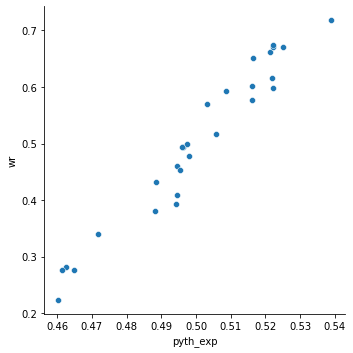

In [24]:
sns.relplot(x="pyth_exp", y="wr", data=main_df)

In [23]:
pyth_lm = smf.ols(formula = 'wr ~ pyth_exp', data=main_df).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wr   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     503.3
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           5.43e-19
Time:                        17:26:50   Log-Likelihood:                 60.048
No. Observations:                  29   AIC:                            -116.1
Df Residuals:                      27   BIC:                            -113.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6842      0.142    -18.894      0.000      -2.976      -2.393
pyth_exp       6.3684      0.284     22.435      0.000       5.786       6.951
==============================================================================
Omnibus:                        1.599   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.477
Skew:                          -0.477   Prob(JB):                        0.478
Kurtosis:                       2.441   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""